🔹 Project Overview

This project explores the Netflix dataset to uncover trends in content production, distribution, and audience targeting.
Using Python (Pandas, Matplotlib, Seaborn), we performed exploratory data analysis (EDA) and visualized key insights about
Netflix’s catalog of movies and TV shows.

🔹 Key Findings

1)Movies vs TV Shows

Netflix hosts more movies than TV shows, but TV shows have been steadily increasing in recent years,reflecting Netflix’s focus on long-term subscriber engagement.

2)Genres & Categories

The most common genres include Dramas, Documentaries, and Stand-Up Comedy.
A significant focus is also seen in International TV Shows, showing Netflix’s global expansion.

3)Content Over the Years

A rapid increase in content after 2015, peaking around 2018–2020.
This growth aligns with Netflix’s aggressive content investment strategy.

4)Top Countries Producing Content

United States dominates content production.
India, UK, and Canada also contribute significantly, highlighting Netflix’s global collaborations.

5)Ratings & Audience Targeting

The majority of content is rated TV-MA (Mature Audience) and TV-14.
Indicates Netflix’s focus on teenagers and adults as its primary audience.



## Loading Data

In [15]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Cleaning Data

In [18]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('NR')
df['duration'] = df['duration'].fillna('Unknown')


In [19]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['date_added'] = df['date_added'].ffill()



## EDA

In [20]:
import matplotlib.pyplot as plt

In [21]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

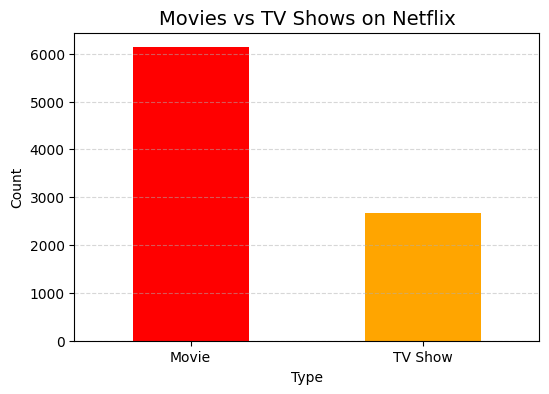

In [22]:
#Type Distribution
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar',color=['red', 'orange'])
plt.title("Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

In [23]:
#Genre Popularity
import seaborn as sns

In [24]:
df['listed_in'].str.split(',' , expand= True).stack().value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'Action & Adventure'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, ' Dramas'),
  Text(6, 0, 'International TV Shows'),
  Text(7, 0, ' Independent Movies'),
  Text(8, 0, ' TV Dramas'),
  Text(9, 0, ' Romantic Movies')])

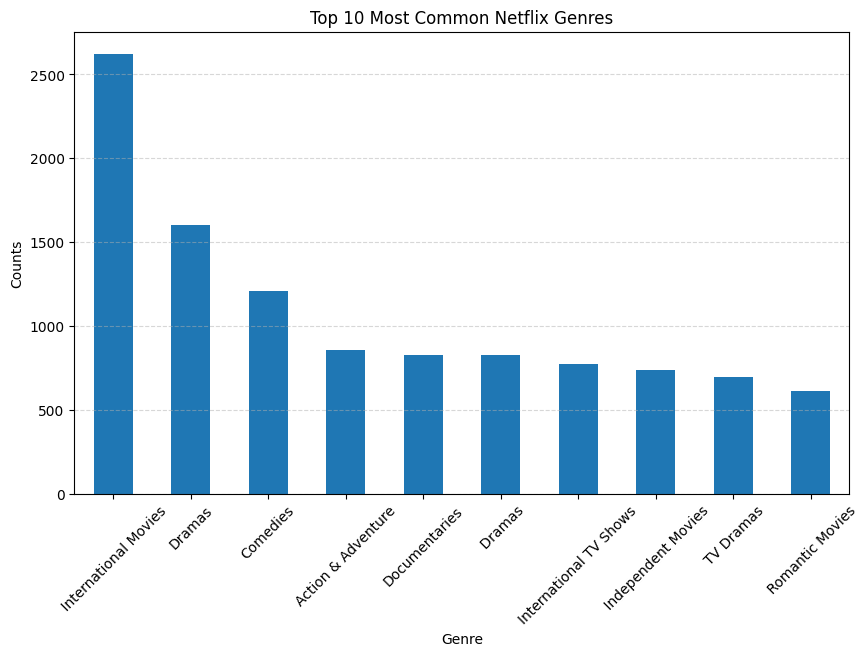

In [25]:
plt.figure(figsize=(10,6))
df['listed_in'].str.split(',' , expand= True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Netflix Genres')
plt.xlabel("Genre")
plt.ylabel("Counts")
plt.grid(axis='y', linestyle = '--',alpha=0.5 )
plt.xticks(rotation=45)

In [26]:
## Top 10 Countries Producing Netflix Content

top_countries = df['country'].value_counts().head(10)
top_countries


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

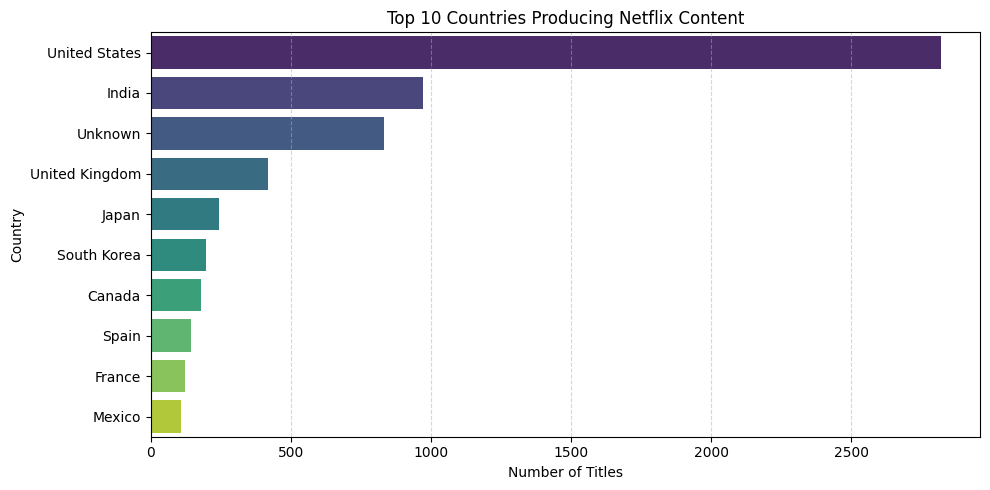

In [27]:

top_df = top_countries.reset_index()
top_df.columns = ['country', 'count']

plt.figure(figsize=(10,5))
sns.barplot( data=top_df, x='count', y='country', hue='country', palette='viridis',
    legend=False)
    
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [28]:
## Content Over the years 
df['release_year'].value_counts().sort_index()


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

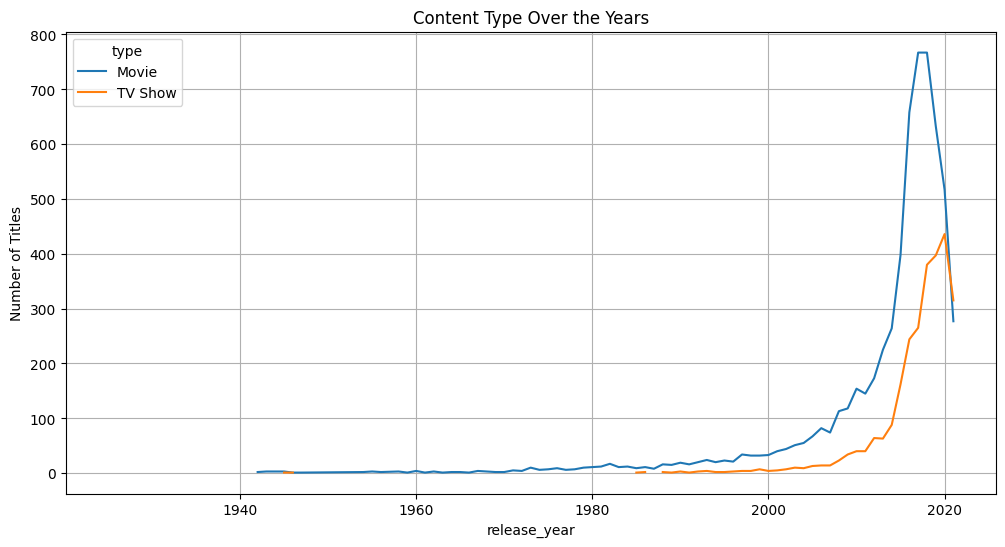

In [29]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line', figsize=(12,6))
plt.title('Content Type Over the Years')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


## Trend & Time Series Insights


In [30]:
##monthly trend (shows how netflix's content release changes by month )
#shows how netflix's 

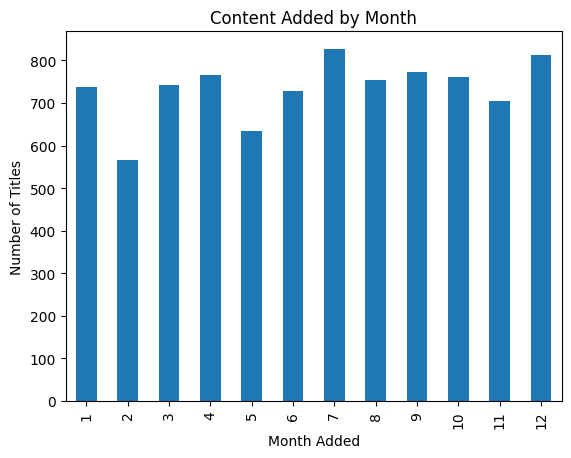

In [31]:
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.title('Content Added by Month')
plt.show()

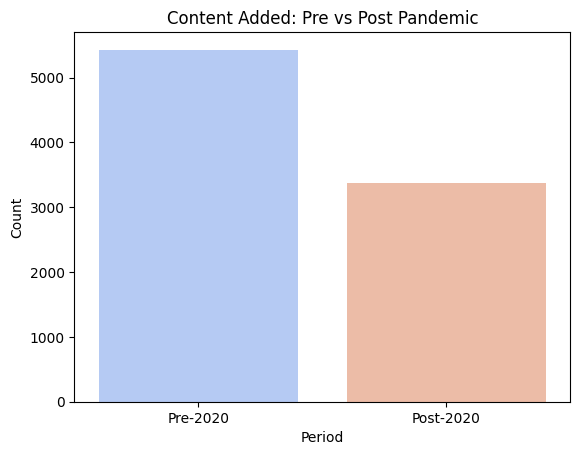

In [32]:
##Pre vs Post Pandemic Trends

df['date_added'] = pd.to_datetime(df['date_added'])

# Split into pre and post pandemic
pre_pandemic = df[df['date_added'].dt.year < 2020].shape[0]
post_pandemic = df[df['date_added'].dt.year >= 2020].shape[0]

# Create summary DataFrame
data = pd.DataFrame({
    'Period': ['Pre-2020', 'Post-2020'],
    'Count': [pre_pandemic, post_pandemic]
})

# Plot
sns.barplot(x='Period', y='Count', hue='Period', palette='coolwarm', legend=False, data=data)
plt.title("Content Added: Pre vs Post Pandemic")
plt.show()

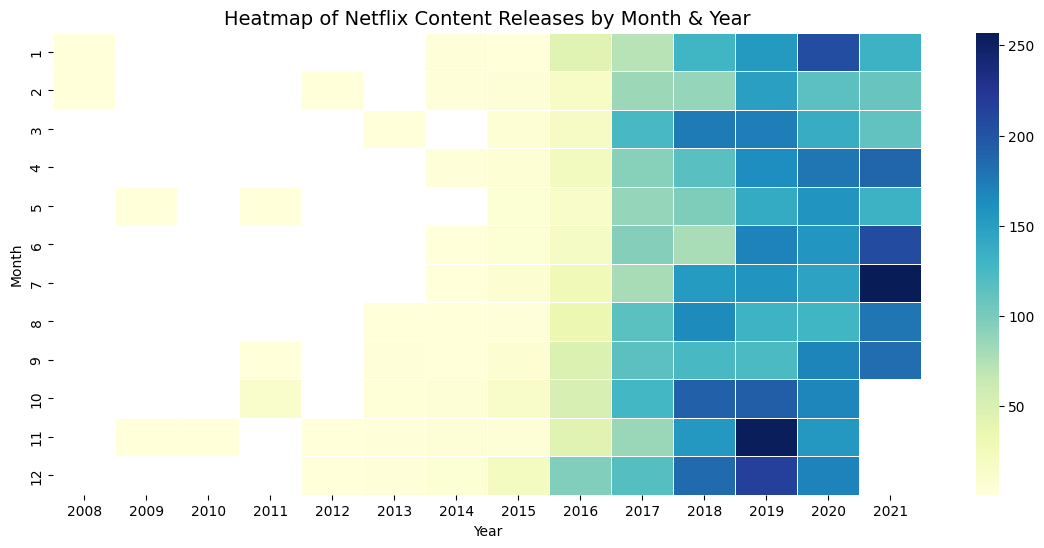

In [38]:
##Heatmap of content releases by month & year

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Create a pivot table (years vs months)
heatmap_data = df.pivot_table(index='month_added', columns='year_added', 
                              values='show_id', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

plt.title("Heatmap of Netflix Content Releases by Month & Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


## 📌 Conclusion & Future Scope

## 🔹 Key Insights
- Netflix has significantly more **Movies** than **TV Shows**, though TV Shows are steadily growing.  
- The **USA and India** contribute the largest share of Netflix content.  
- Popular genres include **Drama, Comedy, and Action**, with regional variations.  
- Content production on Netflix increased sharply after **2015**, with spikes around the **pandemic years**.  
- A handful of **directors and actors** dominate the catalog, reflecting strong partnerships.  
- Netflix tends to release more content in the **second half of the year**.  

##🔹 Limitations
- Dataset only covers titles until **[year in dataset]**, so recent trends may not be reflected.  
- Missing values (e.g., director, cast, country) may slightly bias the results.  
- No **user ratings/reviews** data available to measure actual audience preferences.  

## 🔹 Future Scope
- Perform **sentiment analysis** on movie/show descriptions.  
- Build a **content-based recommendation system**.  
- Compare Netflix with **other OTT platforms** (Prime Video, Disney+, Hulu).  
- Explore **regional language trends** (e.g., Korean dramas, Bollywood).  


📌 *This project helped me explore Netflix’s content trends using Python (Pandas, Matplotlib, Seaborn). It strengthened my skills in data cleaning, exploratory data analysis (EDA), and visualization. In the future, I aim to expand this project by integrating machine learning and cross-platform comparisons.*  
